In [1]:
# KAKSINKERTAINEN EKSPONENTIAALINEN TASOITUSMALLI

# TRENDI, MUTTA EI HAVAITTAVAA KAUSIVAIHTELUA.

# Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
# Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on TRENDI, MUTTA EI HAVAITTAVAA KAUSIVAIHTELUA.
# Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja 
# liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä 
# uusien havaintojen myötä.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
# Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on 
# selkeä kausivaihtelu, jonka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Kuukausi,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [3]:
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df

,Saapuneet
Kuukausi,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


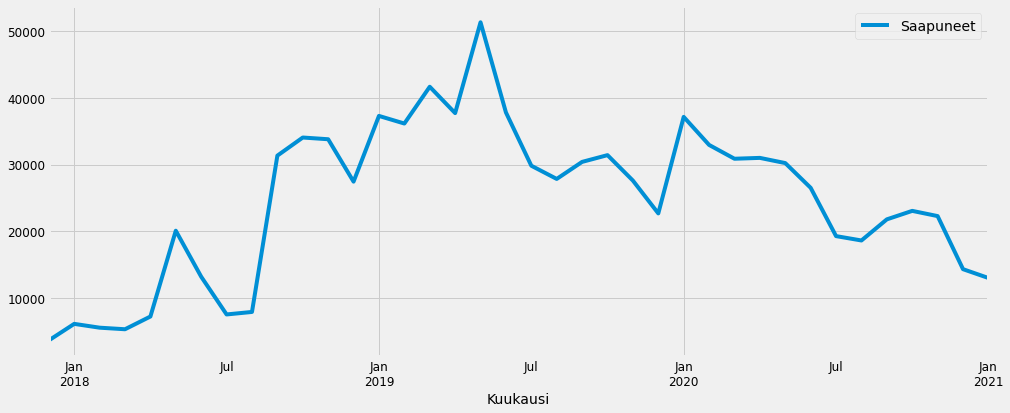

In [4]:
# Visualizing Time Series Data
df.plot(figsize=(15, 6))
plt.show()

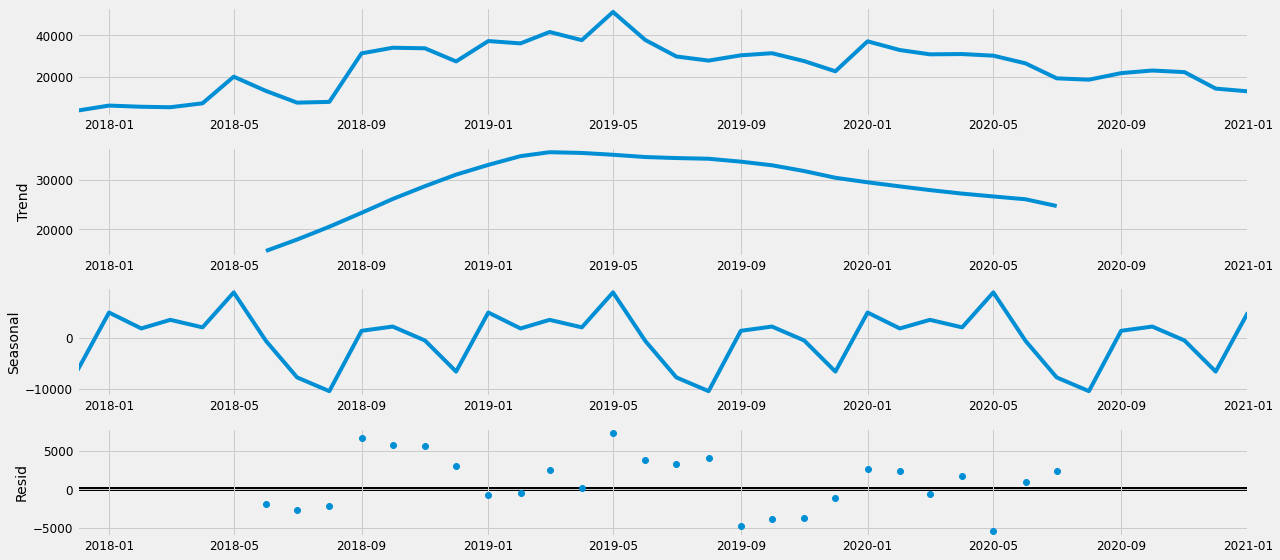

In [5]:
# Visualizing Time Series Data
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [6]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä oN kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', freq='MS').fit()

In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste
Kuukausi,,
2017-12-01,3714,5143.270750
2018-01-01,6185,5728.363818
2018-02-01,5615,7549.708708
2018-03-01,5381,7726.495570
2018-04-01,7284,7506.465273
2018-05-01,20116,8636.304140
2018-06-01,13238,17928.121307
2018-07-01,7594,16576.279661
2018-08-01,7968,11959.804722


<AxesSubplot:xlabel='Kuukausi'>

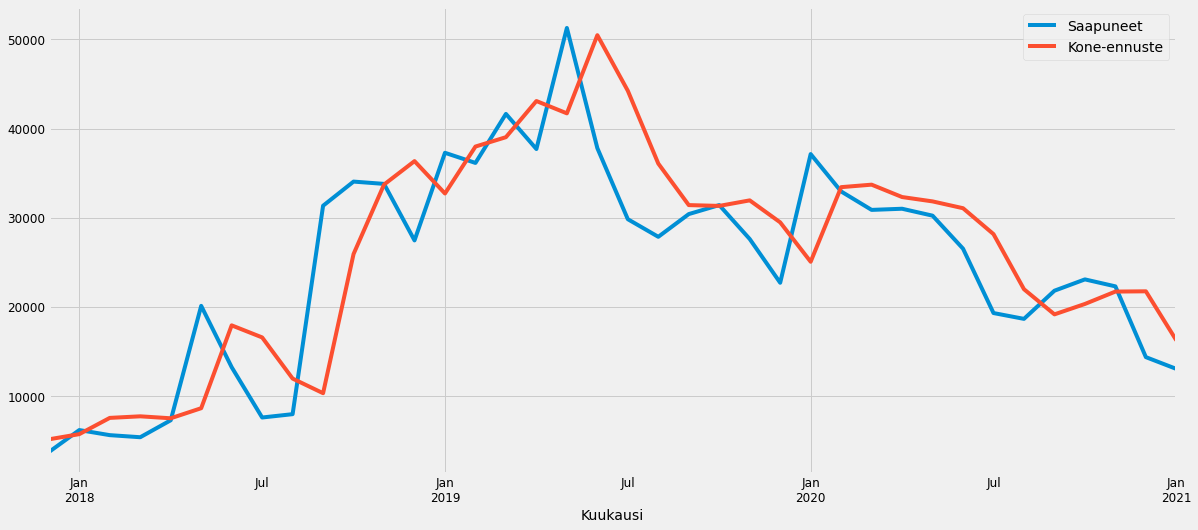

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,5143.270750,-1429.270750
2018-01-01,6185,5728.363818,456.636182
2018-02-01,5615,7549.708708,-1934.708708
2018-03-01,5381,7726.495570,-2345.495570
2018-04-01,7284,7506.465273,-222.465273
2018-05-01,20116,8636.304140,11479.695860
2018-06-01,13238,17928.121307,-4690.121307
2018-07-01,7594,16576.279661,-8982.279661
2018-08-01,7968,11959.804722,-3991.804722


Text(0, 0.5, 'Ennustevirhe')

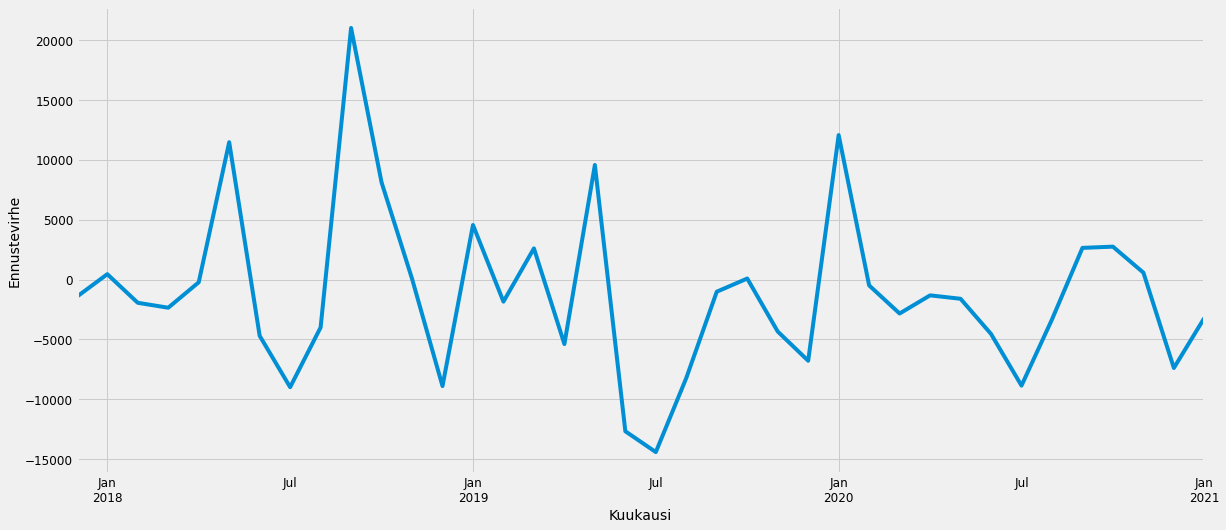

In [10]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

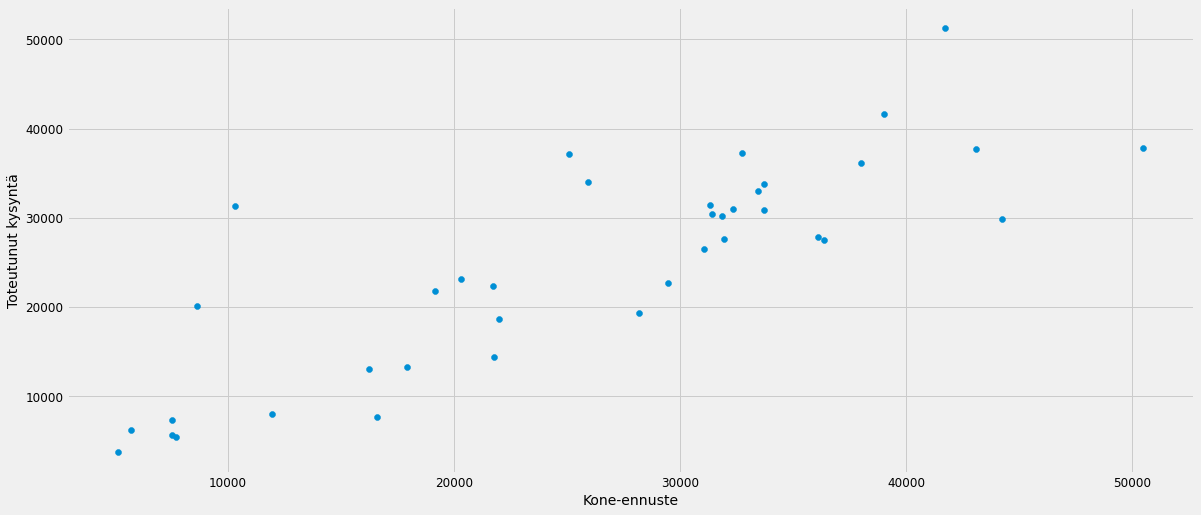

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
malli.summary()

Dep. Variable:,Saapuneet,No. Observations:,38
Model:,ExponentialSmoothing,SSE,1849960281.831
Optimized:,True,AIC,680.632
Trend:,Additive,BIC,687.182
Seasonal:,None,AICC,683.342
Seasonal Periods:,None,Date:,"Thu, 11 Feb 2021"
Box-Cox:,False,Time:,16:39:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6417721,alpha,True
smoothing_trend,0.0884794,beta,True


In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2020-09-01,21814,19161.355553,2652.644447
2020-10-01,23083,20328.094684,2754.905316
2020-11-01,22302,21716.895360,585.104640
2020-12-01,14365,21746.402910,-7381.402910
2021-01-01,13044,16244.086004,-3200.086004


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-02-01', periods = 6, freq = 'MS')

# Ennusteet 6 kuukaudelle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-02-01,13243.509155
2021-03-01,12296.658108
2021-04-01,11349.807061
2021-05-01,10402.956015
2021-06-01,9456.104968
2021-07-01,8509.253921


<AxesSubplot:xlabel='Kuukausi'>

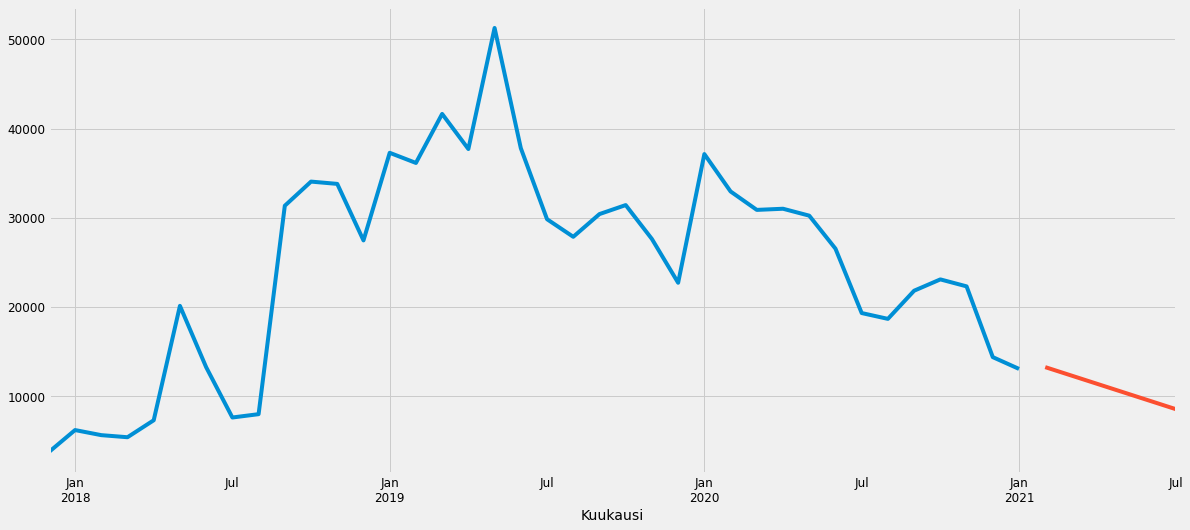

In [15]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [16]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,5143.270750,-1429.270750
2018-01-01,6185,5728.363818,456.636182
2018-02-01,5615,7549.708708,-1934.708708
2018-03-01,5381,7726.495570,-2345.495570
2018-04-01,7284,7506.465273,-222.465273


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

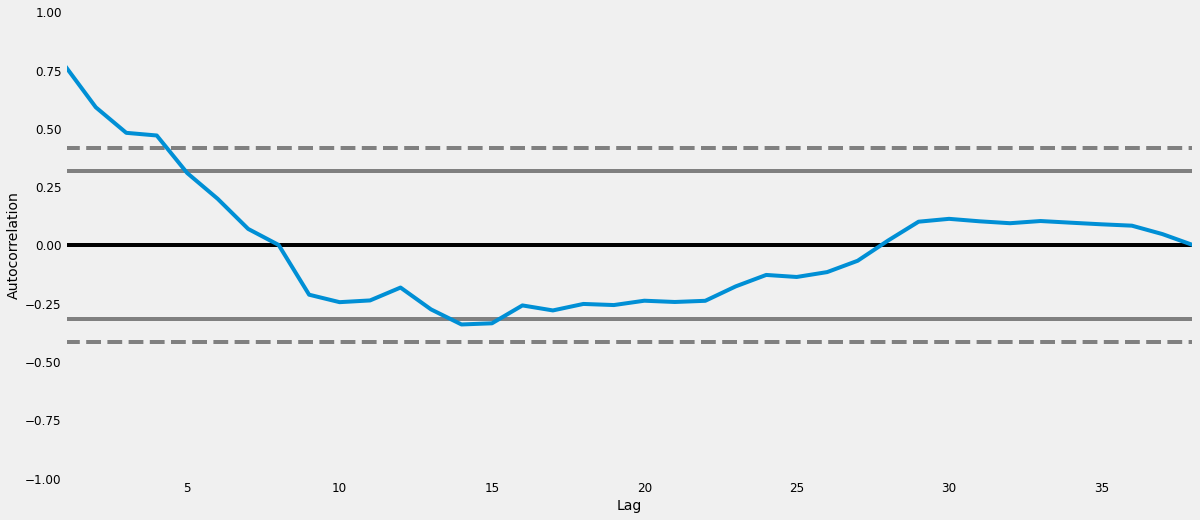

In [17]:
#Aikasarjassa on erotettavissa viiden kuukauden jaksoissa toistuva kausivaihtelu, jota kaksinkertainen 
#eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. 
#Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan 
#korrelaatio viiden kuukauden takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. 
#Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 0-5 
#kohdalla on suurehko korrelaatio. Tämä viittaa  kausivaihtelujaksoon. Kuvion katkoviivat edustavat 
#tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 5 kohdalla korrelaatio on katkoviivan 
#yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Saapuneet'])

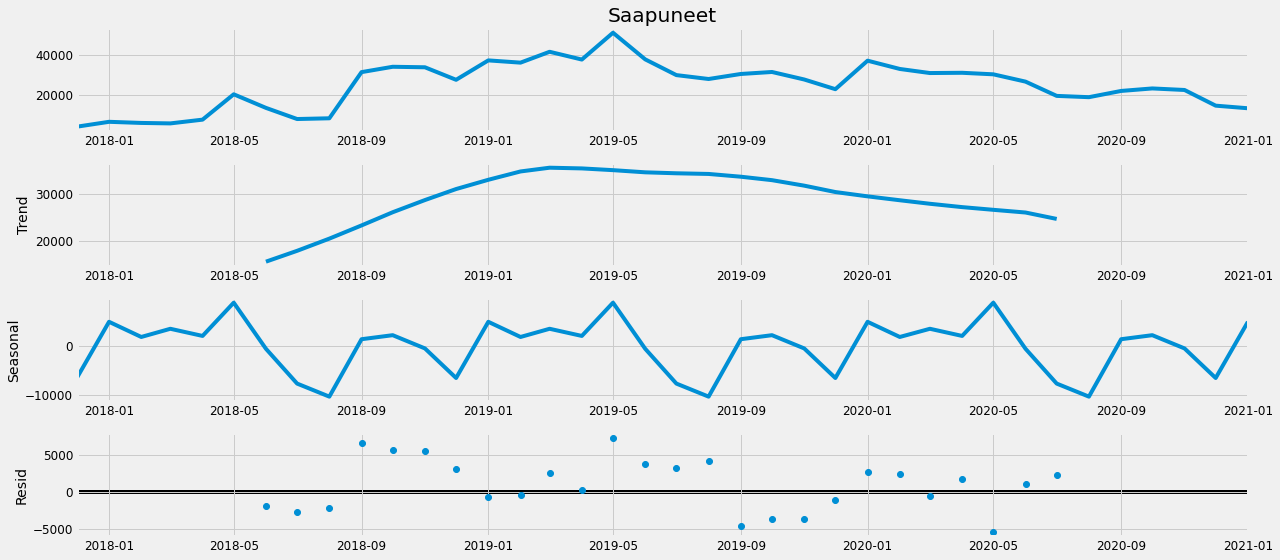

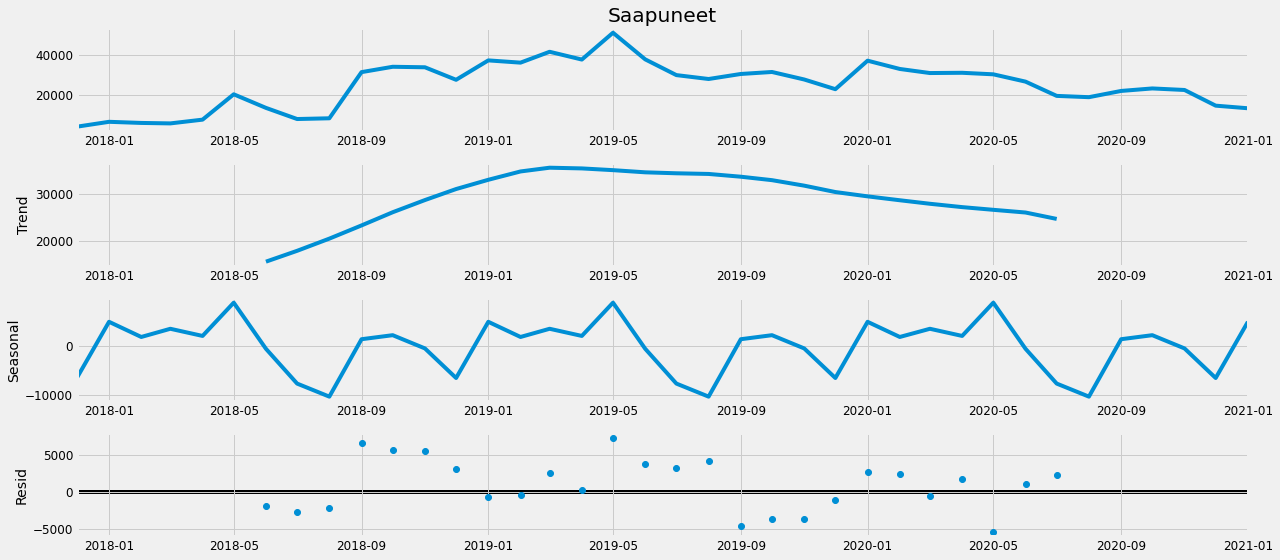

In [18]:
# Plotataan
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Saapuneet']).plot()